## Importing Relevant Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import PIL.Image as image
import pathlib
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

In [2]:
photo_dir='./celeb_photos'

In [3]:
photo_dir=pathlib.Path(photo_dir)
photo_dir

WindowsPath('celeb_photos')

In [4]:
phs=list(photo_dir.glob('*/*'))

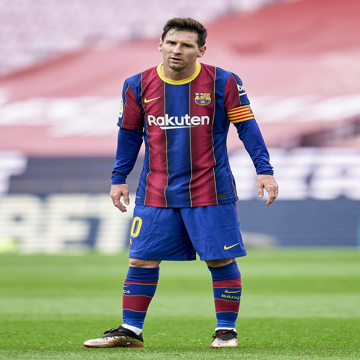

In [5]:
image.open(str(phs[90])).resize((360,360))

## Creating dictionaries for the images and thoer labels

In [6]:
images_dict={
    'messi':list(photo_dir.glob('messi/*')),
    'kohli':list(photo_dir.glob('virat_kohli/*')),
    'ronaldo':list(photo_dir.glob('ronaldo/*')),
    'vettel':list(photo_dir.glob('vettel/*')),
    'PV Sindhu':list(photo_dir.glob('pv_sindhu/*')),
}

In [7]:
photo_labels={
    'messi':0,
    'kohli':1,
    'ronaldo':2,
    'vettel':3,
    'PV Sindhu':4,
}

## Splitting data intoTrain and Test

In [8]:
x,y=[],[]

for celeb_name,celeb_images in images_dict.items():
    for img in celeb_images:
        image=cv2.imread(str(img))
        try:
            resized=cv2.resize(image,(360,360))
        except:
            continue
        x.append(resized)
        y.append(photo_labels[celeb_name])

In [9]:
x=np.array(x)
y=np.array(y)

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [11]:
x_train_scaled=x_train/255.0
x_test_scaled=x_test/255.0

In [12]:
x_train.shape

(357, 360, 360, 3)

In [13]:
y_train.shape

(357,)

## Using Transfer learning to train the model

In [14]:
feature_vector="https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

In [15]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(360,360,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

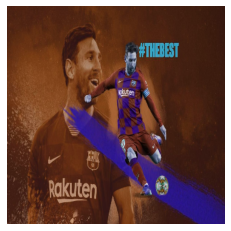

In [33]:
plt.imshow(x[0])
plt.axis('off')
plt.show()

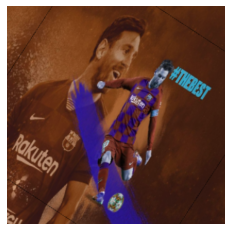

In [34]:
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))
plt.axis('off')
plt.show()

In [18]:
resnet=tf.keras.Sequential([
    data_augmentation,
    hub.KerasLayer(feature_vector,input_shape=(360,360,3),trainable=False),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5)
])

In [19]:
resnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 360, 360, 3)       0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 2048)              23564800  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 10245     
Total params: 23,575,045
Trainable params: 10,245
Non-trainable params: 23,564,800
_________________________________________________________________


In [20]:
resnet.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

In [21]:
resnet.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
12/12 [==============================] - 51s 4s/step - loss: 1.8176 - acc: 0.2381
Epoch 2/10
12/12 [==============================] - 52s 4s/step - loss: 1.4850 - acc: 0.3810
Epoch 3/10
12/12 [==============================] - 52s 4s/step - loss: 1.1943 - acc: 0.5378
Epoch 4/10
12/12 [==============================] - 52s 4s/step - loss: 1.1175 - acc: 0.5742
Epoch 5/10
12/12 [==============================] - 52s 4s/step - loss: 1.0080 - acc: 0.5938
Epoch 6/10
12/12 [==============================] - 52s 4s/step - loss: 0.8886 - acc: 0.6779
Epoch 7/10
12/12 [==============================] - 51s 4s/step - loss: 0.7753 - acc: 0.7395
Epoch 8/10
12/12 [==============================] - 53s 4s/step - loss: 0.7550 - acc: 0.7339
Epoch 9/10
12/12 [==============================] - 51s 4s/step - loss: 0.6512 - acc: 0.7703
Epoch 10/10
12/12 [==============================] - 52s 4s/step - loss: 0.6282 - acc: 0.7843


In [22]:
resnet.evaluate(x_test_scaled,y_test)

4/4 [==============================] - 13s 3s/step - loss: 0.6436 - acc: 0.7647


[0.6436287760734558, 0.7647058963775635]

## Predictions

In [23]:
preds=resnet.predict(x_test_scaled)

In [24]:
preds

array([[-1.04268408e+00, -1.39733338e+00,  4.72041965e-01,
        -7.51799107e-01, -1.69938517e+00],
       [ 8.09317380e-02, -7.67688096e-01, -2.14151883e+00,
        -3.78368211e+00, -1.58027911e+00],
       [-2.82780743e+00, -1.77566457e+00, -1.00087559e+00,
         2.15631676e+00, -1.36274815e+00],
       [-1.92796540e+00, -1.36321056e+00, -5.00751257e-01,
         2.20814896e+00, -3.16344213e+00],
       [-6.72360659e+00, -3.99969667e-01, -1.59933591e+00,
         7.73960829e-01, -1.61755764e+00],
       [-2.77562737e+00, -1.79316592e+00, -1.21880281e+00,
        -2.55363297e+00, -7.27258265e-01],
       [-1.95124555e+00, -1.54620612e+00, -1.69069374e+00,
        -2.21790290e+00, -1.70756865e+00],
       [-1.57116175e+00, -2.63974524e+00, -2.23805666e+00,
         2.13153219e+00, -3.85835147e+00],
       [ 3.75253052e-01, -1.61701870e+00, -1.18256116e+00,
        -2.49127960e+00, -2.35368967e+00],
       [-1.81799006e+00, -2.59392405e+00, -1.93427765e+00,
        -1.49021411e+00

In [25]:
y_pred=[np.argmax(i) for i in preds]

In [26]:
classes=['messi','kohli','ronaldo','vettel','sindhu']

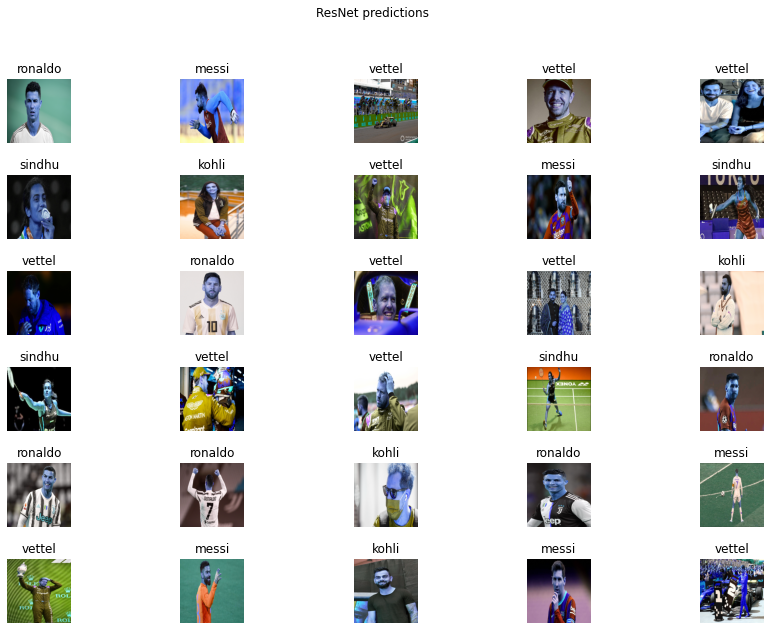

In [27]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(x_test_scaled[n])
    plt.title(classes[y_pred[n]])
    plt.axis('off')
    plt.suptitle("ResNet predictions")

## Confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

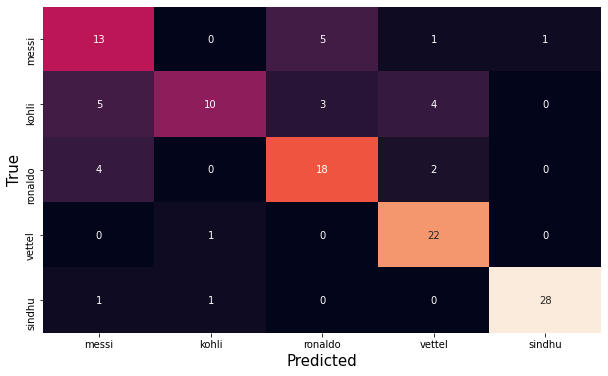

In [35]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,xticklabels=classes,yticklabels=classes,cbar=False)
plt.xlabel('Predicted', size=15)
plt.ylabel('True', size=15)
plt.show()

## Classification Report

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.65      0.60        20
           1       0.83      0.45      0.59        22
           2       0.69      0.75      0.72        24
           3       0.76      0.96      0.85        23
           4       0.97      0.93      0.95        30

    accuracy                           0.76       119
   macro avg       0.76      0.75      0.74       119
weighted avg       0.78      0.76      0.76       119

